<img src="../notebook_imgs/keras-logo-small.jpg" width="20%" />

## Keras: The Python Deep Learning library

## Agenda

1. Load the Fashion-MNIST database of fashion articles
2. Neural Network in Keras
3. Sequential API in Keras
4. Functional API in Keras
5. Compile and use the model
6. Model Save and Load
7. Summary

* Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top of either TensorFlow, CNTK or Theano. 

* It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

* Tensorflow is a deep learning lib for numerical computation and machine intelligence. As a open source resource, data flow graphs are adopted for numerical computation. Mathematical operations are represented by nodes and tensors are represented by graph edges. It is sometimes extremely technical.

* In contrast, Kera makes deep neural network coding simple. It also runs seamlessly on CPU and GPU machines.

Sklearn and Keras 

* Pipeline for SKlearn

<img src="../notebook_imgs/sklearn_pipeline.png" width="40%">

* Pipeline for Keras

<img src="../notebook_imgs/k_pipeline.png" width="40%">

## Part 1: Load the data from Keras

- The data format in Keras is Numpy Array.
- For deep learning, the input data is tensor.

   1. ```2D tensor```: data table  
   2. ```3D tensor```: sequence data , images data black/white
   3. ```4D tensor```: images data RGB values
   4. ```5D tensor```: videos data

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras

In [2]:
# load the Fashion-MNIST database of fashion articles
data = keras.datasets.fashion_mnist

In [3]:

(x_train, y_train),(x_test, y_test) = data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print( x_train.shape )
print( x_test.shape )
print( y_train.shape )
print( y_test.shape )

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
# the known class mapping
class_names = [ "T-shirt/top", "Trouser", "Pullover", 
                "Dress", "Coat", "Sandal", "Shirt",
                "Sneaker", "Bag", "Ankle boot" ]

class_names[y_train[0]]

'Ankle boot'

In [5]:
y_train[0]

9

In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

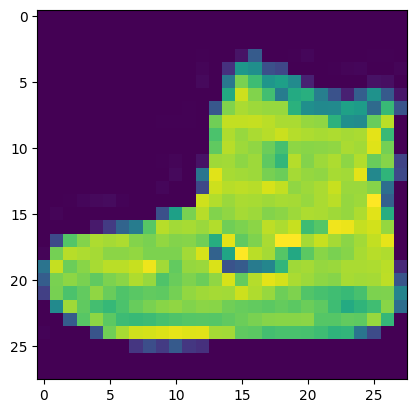

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

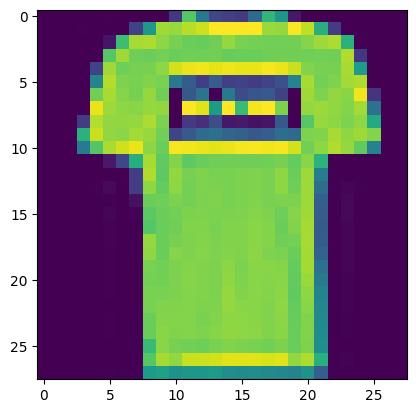

In [10]:
plt.imshow(x_train[1])

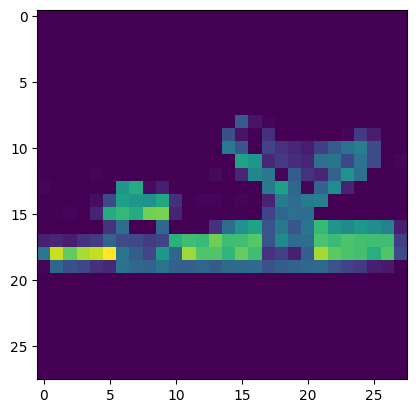

In [11]:
plt.imshow(x_train[-1])

## Part 2: Neural Network in Keras

In keras, four components are required to build a neural network:

1. Layers and models 
2. Input and output
3. Loss function
4. Optimizer

These four components works as:

Multiple **layers** can connected together to form a **model**. Then, the **input** will be mapped by the **model** to the prediction. The prediction will be compared to the **output** in the **loss function** to derive the loss value. **Optimizer** then updates the model parameters to reduce the loss value. 

>**Layer**

        The basic class in keras. Different layers are used for different data types. For example,

        1. 2D data (num of samples, num of features): ```Dense```
        2. 3D data (num of samples, length of sequence, num of features): ```RNN```, ```GRU```,```LSTM```,```Conv1D```
        3. 4D data (num of samples, width, height, num of channels): ```Conv2D```

>**Model**

       Model is the directed acyclic graph of layers. For example, it can be the stacking of multiple layers in the mode of     
       ```single input to single output```

>**Loss function**

        How to evaluate the model for the tasks.  Some simple ginelines to choose a loss function are given:

        1. Binary Classification ```binary_crossentropy```
        2. Multi-class Classification: ```categorical_crossentropy```
        3. Regression: ```mean_squared_error```

>**Optimizer**
    
        Various variants of Optimizers are provided by Keras:

        * SGD
        * Adagrad
        * Adadelta
        * RMSprop
        * Adam
        * AdaMax
        * AMSGrad
        * etc

http://ruder.io/optimizing-gradient-descent/.

<img src="https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif" width="40%">

Source & Reference: https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif

## Part 3: Sequential Method (Linear Stack)

The sequential method allows you to create models ```layer-by-layer``` for most problems, i.e., a linear stacking of layers. It is limited in that it does not allow you to create models that share layers or have ```multiple inputs or outputs```.

Some models structures are shown as below:

1. Layer-by-Layer or Single input Single Output

<img src="../notebook_imgs/sinsout.png" width="10%">

2. Multiple Inputs

Housing price prediction based on images and tabular data

<img src="../notebook_imgs/mult-input.jpg" width="40%">

3. Multiple Outputs

Object and color recognition from images

<img src="imgs/mult-output.jpg" width="40%">

In [12]:
model = keras.models.Sequential() # create a container

# Then, use add() to insert layers into the container
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))



<img src="../notebook_imgs/flatten.jpg" width="40%">

<img src="../notebook_imgs/dense.png" width="40%">

In [13]:
model.layers

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Part 4: Functional Method (graph)

the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

The idea is that the layer is used a function

In [15]:
from keras.models import Model
from keras.layers import Input,  Dense, Flatten

In [16]:
imgs = Input(shape=[28,28])
# Flatten() is a function
x = Flatten()(imgs)
#  Dense(100, activation='relu') is a function
x = Dense(100, activation='relu')(x)
#  Dense(10, activation='softmax') is a function
imglabel = Dense(10, activation='softmax')(x)
# Using such 'functions', input is mapped to output
# Using Model to build the final connections.
model = Model( inputs = [imgs], outputs=[imglabel])

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


---
Sequential API VS Functional API

<img src="../notebook_imgs/matchm.png" width="40%">

## Part 5:  Compile and use the model

    1. loss and optimizer are two reuqired arguments for compiling a keras model
    2. metrics can be set to monitor the performance during training

In [18]:
# Selection of optimization is quite important, you may try 'sgd' to replace 'adam' and compare the performances 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [19]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20


2022-12-30 09:32:06.093308: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 910us/step - loss: 0.5042 - acc: 0.8223
Epoch 2/20
1875/1875 [==============================] - 2s 894us/step - loss: 0.3806 - acc: 0.8632
Epoch 3/20
1875/1875 [==============================] - 2s 895us/step - loss: 0.3418 - acc: 0.8759
Epoch 4/20
1875/1875 [==============================] - 2s 920us/step - loss: 0.3184 - acc: 0.8843
Epoch 5/20
1875/1875 [==============================] - 2s 925us/step - loss: 0.3014 - acc: 0.8902
Epoch 6/20
1875/1875 [==============================] - 2s 919us/step - loss: 0.2877 - acc: 0.8942
Epoch 7/20
1875/1875 [==============================] - 2s 914us/step - loss: 0.2754 - acc: 0.8977
Epoch 8/20
1875/1875 [==============================] - 2s 927us/step - loss: 0.2645 - acc: 0.9013
Epoch 9/20
1875/1875 [==============================] - 2s 919us/step - loss: 0.2562 - acc: 0.9050
Epoch 10/20
1875/1875 [==============================] - 2s 923us/step - loss: 0.2480 - acc: 0.9066
Epoch 11/20
1875/187

#### Model Prediction

In [20]:
# check the predicted results
prob = model.predict(x_test[0:1])

print(prob)

1/1 [==============================] - 0s 32ms/step
[[3.8201773e-19 5.4638545e-17 8.2594160e-19 4.3235138e-19 4.3121815e-19
  4.3041022e-05 8.9921291e-18 2.8378726e-04 1.9551477e-13 9.9967313e-01]]


In [21]:
import numpy as np
print( np.argmax(prob) )
print( y_test[0] )
print( np.argmax(y_test[0]) )

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


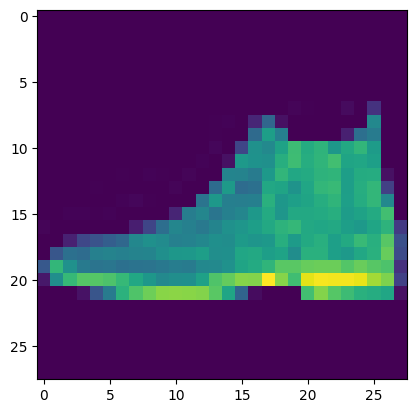

In [22]:
plt.imshow(x_test[0])

In [23]:
# First value is loss, second is accuracy.
result = model.evaluate( x_test, y_test )
print('Model loss: %f' % result[0])
print('Model accuracy: %f' % result[1])

313/313 [==============================] - 0s 433us/step - loss: 0.3697 - acc: 0.8827
Model loss: 0.369684
Model accuracy: 0.882700


## Part 6: Model Save and Load

>The model has a `save` method, which saves all the details necessary to reconstitue the model. You can check the following example:

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [24]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')
prob = model.predict(x_test[2:3])
print(prob)

1/1 [==============================] - 0s 16ms/step
[[3.2056983e-12 1.0000000e+00 1.1687495e-13 9.0207362e-11 5.0327318e-15
  2.2772323e-28 2.6008796e-13 0.0000000e+00 2.3683602e-15 1.9722199e-25]]


In [25]:
predicted_class = np.argmax(prob)
print('Predict class = %d' % predicted_class)
print(class_names[predicted_class])

Predict class = 1
Trouser


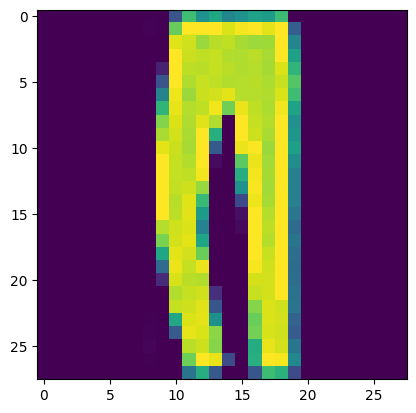

In [26]:
plt.imshow(x_test[2])

## Part 7: Summary

We will use CNN to address this "toy" image classification problem. And, to prevent overfitting, validation dataset is created. And we will try some regularization tricks for deep learning.

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout
from keras.models import Model
import keras
data = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = data.load_data()

In [28]:
x_train_all = x_train_all.reshape(60000, 28, 28, 1)
x_test  = x_test.reshape(10000, 28, 28, 1)

x_val, x_train = x_train_all[:5000] / 255.0, x_train_all[5000:] / 255.0
y_val, y_train = y_train_all[:5000] , y_train_all[5000:] 

In [29]:
(28 - (3-1) )

26

In [30]:
imgs = Input(shape=[28,28, 1])

x = Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1))(imgs)
x = MaxPooling2D(2,2)(x) 
x = Conv2D(64, (3,3), activation='relu')(x) 
x = MaxPooling2D(2,2)(x) 
x = Flatten()(x)
# x=Dropout(0.5)(x) 
x = Dense(128, activation='relu')(x)
imglabel = Dense(10, activation='softmax')(x)
model = Model( inputs = [imgs], outputs=[imglabel])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, 
          y_train, 
          epochs=20,
          validation_data=(x_val, y_val))

Epoch 1/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4521 - acc: 0.8359 - val_loss: 0.3207 - val_acc: 0.8856
Epoch 2/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3057 - acc: 0.8888 - val_loss: 0.2657 - val_acc: 0.9046
Epoch 3/20
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2585 - acc: 0.9036 - val_loss: 0.2538 - val_acc: 0.9090
Epoch 4/20
1199/1719 [===================>..........] - ETA: 5s - loss: 0.2241 - acc: 0.9179

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epoch_number = range(len(acc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6), dpi=100)
plt.subplot(2,1,1)
plt.plot(epoch_number, acc, 'r', label='train acc')
plt.plot(epoch_number, val_acc, 'b', label='val acc')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(epoch_number, loss, 'r', label='train loss')
plt.plot(epoch_number, val_loss, 'b', label='val loss')
plt.title('Train and Validation Loss')
plt.legend()

plt.show()

In [ ]:
plt.plot(epoch_number, acc, 'r', label='train acc')
plt.plot(epoch_number, val_acc, 'b', label='val acc')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.show()

##### Overfitting
Training acc is over 98.7%, while validation acc is only 91.8%.  Try to add the dropout layer.

An gentle introduction to Dropout technique

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5